# Analyzing Bay Wheels trip data on April 2020
**by Gabriel Medeiros das Neves**

## Introduction

Write a briefly introduction to the study and the dataset here.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Wrangling
In this section of the report I will gather the necessary data, understand its general properties, identify and clean possible issues, such as missing or incorrect values, for example.

### Gather
Here I'll be converting the provided `.csv` file in a Pandas DataFrame.

In [2]:
trip_data = pd.read_csv('baywheels_tripdata.csv')
trip_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5A1FF31692371859,electric_bike,2020-04-04 08:28:20,2020-04-04 08:33:34,NaN,NaN,NaN,NaN,37.7692,-122.4209,37.7703,-122.4069,casual
1,D8D5BA2D4F051133,electric_bike,2020-04-03 18:55:43,2020-04-03 19:21:05,NaN,NaN,NaN,NaN,37.8023,-122.4244,37.8023,-122.4244,casual
2,A3633A9140CA4FF8,electric_bike,2020-04-04 15:11:04,2020-04-04 15:12:21,NaN,NaN,NaN,NaN,37.7667,-122.3961,37.7667,-122.3962,casual
3,301F57EB0197A5E0,electric_bike,2020-04-03 20:21:03,2020-04-03 22:08:06,8th St at Ringold St,60.0,NaN,NaN,37.7744,-122.4095,37.7805,-122.4033,casual
4,9429C701AF5744B3,electric_bike,2020-04-03 18:39:39,2020-04-03 18:47:19,NaN,NaN,NaN,NaN,37.8027,-122.4433,37.8009,-122.4269,casual


### Assess
The main objective of the Assess section is to better understand each piece of data and identify possible issues that must be cleaned.

In [3]:
trip_data.sample(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
58806,099E31096467D567,electric_bike,2020-04-15 13:25:14,2020-04-15 13:45:43,Brannan St at 7th St,482.0,Dolores St at 15th St,96.0,37.7728,-122.4035,37.7661,-122.4266,member
43967,E30CC6D46561903B,docked_bike,2020-04-21 19:24:03,2020-04-21 19:41:35,Heron's Head Park,463.0,Williams Ave at 3rd St,358.0,37.7403,-122.3768,37.7293,-122.3929,member
66296,FBB677A5781A6824,docked_bike,2020-04-28 17:33:49,2020-04-28 17:37:24,McAllister St at Baker St,52.0,Grove St at Divisadero,53.0,37.7774,-122.4418,37.7759,-122.4378,member
83261,B52A2C803E5734BC,electric_bike,2020-04-15 07:49:31,2020-04-15 07:58:27,Scott St at Golden Gate Ave,39.0,Carl St at Cole St,440.0,37.7791,-122.4370,37.7660,-122.4492,member
35639,3B29E370638248F6,electric_bike,2020-04-24 18:17:40,2020-04-24 19:27:24,NaN,NaN,NaN,NaN,37.7779,-122.4401,37.7591,-122.4100,member


In [4]:
trip_data.shape

(84259, 13)

In [5]:
trip_data.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [6]:
trip_data.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    30825
start_station_id      30825
end_station_name      32401
end_station_id        32401
start_lat                 0
start_lng                 0
end_lat                 142
end_lng                 142
member_casual             0
dtype: int64

In [7]:
trip_data.rideable_type.unique()

array(['electric_bike', 'docked_bike'], dtype=object)

In [8]:
trip_data.member_casual.unique()

array(['casual', 'member'], dtype=object)

In [9]:
trip_data.start_station_name.unique()

array([nan, '8th St at Ringold St', 'Chestnut St at Van Ness Ave',
       'Buchanan St at North Point St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Post St at Webster St', '4th St at 16th St',
       'McKinnon Ave at 3rd St', 'Precita Park', 'Central Ave at Fell St',
       'Funston Ave at Fulton St', 'Steiner St at California St',
       'The Embarcadero at Bryant St', 'Market St at Steuart St',
       'Leavenworth St at Broadway',
       'Union Square (Powell St at Post St)', '10th St at Empire St',
       'Market St at Dolores St', 'Davis St at Jackson St',
       'Salesforce Transit Center (Natoma St at 2nd St)',
       '4th St at Mission Bay Blvd S', '23rd St at Taylor St',
       'Folsom St at 19th St', '15th St at Potrero Ave',
       'Market St at 10th St', 'Jones St at Post St',
       'Fell St at Stanyan St', 'Octavia Blvd at Page St',
       'Eureka Valley Recreation Center', 'S Park St at 3rd St',
       'Golden Gate Ave at Hyde St', 'Sonora Ave at

In [10]:
trip_data.end_station_name.unique()

array([nan, '4th St at 16th St',
       'Montgomery St BART Station (Market St at 2nd St)', 'Precita Park',
       'Grove St at Divisadero',
       'Garfield Square (25th St at Harrison St)',
       'Post St at Webster St', 'Broderick St at Oak St',
       'Central Ave at Fell St', 'Greenwich St at Franklin St',
       '10th St at Empire St', 'Leavenworth St at Broadway',
       'Davis St at Jackson St', '4th St at Mission Bay Blvd S',
       'San Francisco Public Library (Grove St at Hyde St)',
       '15th St at Potrero Ave', '23rd St at Tennessee St',
       'Mission Playground', 'Jones St at Post St',
       'Market St at Dolores St', 'Fell St at Stanyan St',
       'Golden Gate Ave at Polk St', 'S Park St at 3rd St',
       'Sonora Ave at 1st St', '20th St at Bryant St',
       'Market St at 10th St', 'Scott St at Golden Gate Ave',
       'Broadway at Kearny',
       'San Francisco Caltrain (Townsend St at 4th St)',
       '23rd St at Taylor St', 'Parker Ave at McAllister St',
   

In [11]:
trip_data.started_at.iloc[0]

'2020-04-04 08:28:20'

#### Observed Issues

1. Missing data in **station columns** and **end coordinates**.
2. **Date columns** are strings instead of datetime.
3. The column name **"member_casual"** does not match the column values, since the column is representing the user account type.
4. There are some unhelpful columns for the scope of this analysis.

### Clean
Here I will be defining and executing programmatic solutions for each identified issue in the Assess section, as well as testing whether the proposed solution solved the problem or not.

#### Define
1. The missing stations will be filled with **"Not informed"** values, while the coordinates columns will not be filled as they do not belong to the scope of this analysis.
2. Use the pandas [to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) method to convert column values to datetime.
3. Rename column to **"account_type"**.
4. Drop `ride_id`, `start_station_id`, `end_station_id`, `start_lat`, `start_lng`, `end_lat` and `end_lng` columns.

#### Code and Test
Here I will be using code techniques to clean up the data as planned in the **Define** section.

In [12]:
clean_trip_data = trip_data.copy()

In [13]:
clean_trip_data.drop(['ride_id', 'start_station_id', 
                      'end_station_id', 'start_lat', 
                      'start_lng', 'end_lat', 'end_lng'], axis=1, inplace=True)
clean_trip_data.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual
0,electric_bike,2020-04-04 08:28:20,2020-04-04 08:33:34,NaN,NaN,casual
1,electric_bike,2020-04-03 18:55:43,2020-04-03 19:21:05,NaN,NaN,casual
2,electric_bike,2020-04-04 15:11:04,2020-04-04 15:12:21,NaN,NaN,casual
3,electric_bike,2020-04-03 20:21:03,2020-04-03 22:08:06,8th St at Ringold St,NaN,casual
4,electric_bike,2020-04-03 18:39:39,2020-04-03 18:47:19,NaN,NaN,casual


In [14]:
clean_trip_data.fillna('Not informed', inplace=True)
clean_trip_data.isnull().sum()

rideable_type         0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
member_casual         0
dtype: int64

In [15]:
clean_trip_data['started_at'] = pd.to_datetime(clean_trip_data.started_at)
clean_trip_data['ended_at'] = pd.to_datetime(clean_trip_data.ended_at)
clean_trip_data.started_at.iloc[0]

Timestamp('2020-04-04 08:28:20')

In [16]:
clean_trip_data.rename(columns={'member_casual': 'account_type'}, inplace=True)
clean_trip_data.sample(5)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,account_type
76086,docked_bike,2020-04-26 14:36:33,2020-04-26 14:41:23,Harrison St at 20th St,17th & Folsom Street Park (17th St at Folsom St),member
19696,electric_bike,2020-04-27 17:25:04,2020-04-27 19:22:21,Fell St at Stanyan St,Not informed,casual
46883,electric_bike,2020-04-02 13:44:17,2020-04-02 14:16:52,Jackson St at Polk St,Howard St at Beale St,member
39797,docked_bike,2020-04-30 17:09:16,2020-04-30 17:40:16,Bancroft Way at Telegraph Ave,Hearst Ave at Euclid Ave,member
4714,electric_bike,2020-04-24 14:40:42,2020-04-24 15:12:19,Not informed,Not informed,casual


### Feature Engineering

Here I'll be using the knowledge acquired by inspecting the dataframes to create new features, aiming to facilitate the exploration.

In [17]:
clean_trip_data['started_hour'] = clean_trip_data.started_at.dt.hour
clean_trip_data['ended_hour'] = clean_trip_data.ended_at.dt.hour
clean_trip_data.sample(5)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,account_type,started_hour,ended_hour
15884,electric_bike,2020-04-06 04:15:40,2020-04-06 04:19:13,Not informed,Not informed,casual,4,4
53759,electric_bike,2020-04-19 18:17:51,2020-04-19 19:10:59,Townsend St at 5th St,Mission Playground,member,18,19
71971,electric_bike,2020-04-18 08:02:08,2020-04-18 08:16:28,Funston Ave at Irving St,Laurel St at California St,member,8,8
20999,electric_bike,2020-04-29 16:08:03,2020-04-29 16:27:37,Howard St at 8th St,Not informed,casual,16,16
27284,electric_bike,2020-04-18 18:15:32,2020-04-18 18:37:12,Grove St at Masonic Ave,Not informed,casual,18,18


In [18]:
clean_trip_data['monthday'] = clean_trip_data.started_at.dt.day
clean_trip_data.sample(5)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,account_type,started_hour,ended_hour,monthday
64527,electric_bike,2020-04-24 14:18:48,2020-04-24 14:37:17,Not informed,Not informed,member,14,14,24
53620,electric_bike,2020-04-09 19:48:58,2020-04-09 20:03:28,Cruise Terminal at Pier 27,The Embarcadero at Bryant St,member,19,20,9
19365,electric_bike,2020-04-25 02:21:04,2020-04-25 02:28:31,Not informed,Not informed,casual,2,2,25
39287,docked_bike,2020-04-19 18:16:42,2020-04-19 18:30:32,Post St at Kearny St,Powell St BART Station (Market St at 4th St),member,18,18,19
44876,docked_bike,2020-04-12 18:09:41,2020-04-12 20:10:51,Market St at Steuart St,Green St at Van Ness St,casual,18,20,12


In [19]:
clean_trip_data['weekday'] = clean_trip_data.started_at.dt.weekday
clean_trip_data['weekday'] = clean_trip_data.weekday.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
                                                          3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
clean_trip_data.sample(5)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,account_type,started_hour,ended_hour,monthday,weekday
68211,docked_bike,2020-04-13 18:21:27,2020-04-13 18:38:02,West St at 40th St,Telegraph Ave at Ashby Ave,member,18,18,13,Monday
28067,electric_bike,2020-04-23 12:11:32,2020-04-23 12:14:05,Glen Park BART Station,Glen Park BART Station,casual,12,12,23,Thursday
69387,electric_bike,2020-04-11 14:31:35,2020-04-11 14:52:20,Howard St at 8th St,16th St at Prosper St,member,14,14,11,Saturday
84121,electric_bike,2020-04-12 12:59:25,2020-04-12 13:12:52,Alamo Square (Steiner St at Fulton St),Duboce Park,member,12,13,12,Sunday
41305,electric_bike,2020-04-01 16:13:41,2020-04-01 16:49:13,Post St at Divisadero St,48th Ave at Cabrillo St,member,16,16,1,Wednesday


In [20]:
clean_trip_data['trip_time'] = clean_trip_data.ended_at - clean_trip_data.started_at
clean_trip_data['trip_time'] = ((clean_trip_data.trip_time.dt.days * 1440) + 
                                (clean_trip_data.trip_time.dt.seconds / 60))
clean_trip_data.head(3)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,account_type,started_hour,ended_hour,monthday,weekday,trip_time
0,electric_bike,2020-04-04 08:28:20,2020-04-04 08:33:34,Not informed,Not informed,casual,8,8,4,Saturday,5.233333
1,electric_bike,2020-04-03 18:55:43,2020-04-03 19:21:05,Not informed,Not informed,casual,18,19,3,Friday,25.366667
2,electric_bike,2020-04-04 15:11:04,2020-04-04 15:12:21,Not informed,Not informed,casual,15,15,4,Saturday,1.283333


In [21]:
clean_trip_data.drop(['started_at', 'ended_at'], axis=1, inplace=True)
clean_trip_data.sample(5)

,rideable_type,start_station_name,end_station_name,account_type,started_hour,ended_hour,monthday,weekday,trip_time
12310,electric_bike,Not informed,Not informed,casual,9,10,25,Saturday,46.016667
17456,electric_bike,Not informed,Fell St at Stanyan St,casual,10,11,12,Sunday,39.633333
39710,electric_bike,Not informed,Not informed,member,11,11,28,Tuesday,5.916667
30929,electric_bike,The Embarcadero at Sansome St,Brannan St at Colin P Kelly Jr St,casual,11,11,25,Saturday,15.766667
55830,electric_bike,7th Ave at Clement St,Broderick St at Oak St,member,18,18,11,Saturday,13.316667


## Exploratory Data Analysis
The Exploratory Data Analysis section is where I'll be focusing on computing statistics and creating visualizations to explore the dataset. 

#### What is the structure of the dataset?
There are 84,259 bike rents in the dataset with 9 features (rideable_type, start_station_name, end_station_name, account_type, started_hour, ended_hour, monthday, weekday, and trip_time). 

**Column data types:**
1. `rideable_type`: object (str)
2. `start_station_name`: object (str)
3. `end_station_name`: object (str)
4. `account_type`: object (str)
5. `started_hour`: integer
6. `ended_hour`: integer
7. `monthday`: integer
8. `weekday`: object (str)
9. `trip_time`: float (representing minutes)

#### What is/are the main feature(s) of interest in the dataset?
I'm most interested in understanding which features are correlated to the number of rents, I'll probably be researching at what time of the day most rentals occur, which type of bike is most popular, which days of the week have the most rentals, etc.  
I'm also interested in figuring out what features are best for predicting the trip time of a rent.

#### What features in the dataset  will probably help support the investigation into the feature(s) of interest?
I believe that the day of the week and the time of day will be determining factors when investigating my features of interest, although I assume that the remaining features will also have relevant information to the analysis.

### Univariate Exploration
Here I'll be investigating distributions of individual variables.

#### Descriptive statistics

In [22]:
clean_trip_data.describe()

,started_hour,ended_hour,monthday,trip_time
count,84259.000000,84259.000000,84259.000000,84259.000000
mean,14.354360,14.620290,17.064587,34.476465
std,4.358705,4.423126,8.424906,605.103733
min,0.000000,0.000000,1.000000,-1.533333
25%,12.000000,12.000000,10.000000,6.666667
50%,15.000000,15.000000,18.000000,12.516667
75%,17.000000,18.000000,25.000000,24.633333
max,23.000000,23.000000,30.000000,54728.866667


#### Rideable type

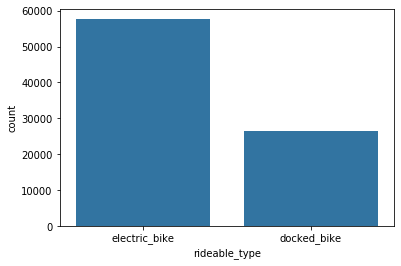

In [23]:
base_color = sns.color_palette()[0]
sns.countplot(data = clean_trip_data, x = 'rideable_type', color = base_color);

#### Start station

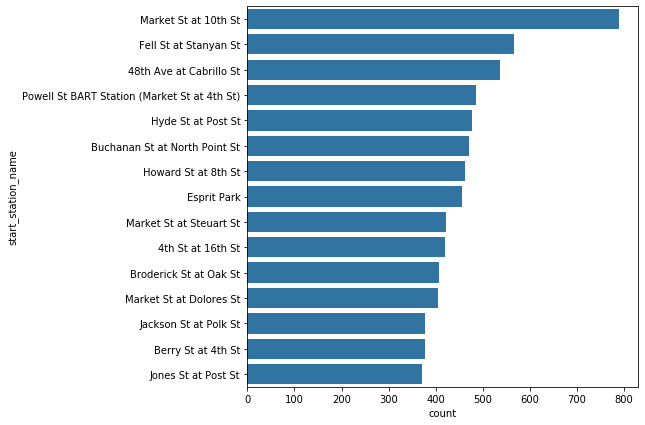

In [24]:
plt.figure(figsize=(7, 7))
popular_start_stations = clean_trip_data['start_station_name'].value_counts().index[1:16]
sns.countplot(data = clean_trip_data, y = 'start_station_name', color = base_color, order = popular_start_stations);

In [25]:
clean_trip_data.start_station_name.value_counts()['Not informed']

30825

#### End station

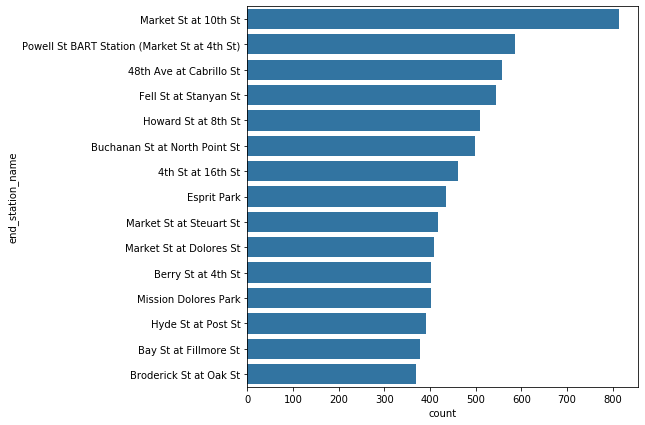

In [26]:
plt.figure(figsize=(7, 7))
popular_end_stations = clean_trip_data['end_station_name'].value_counts().index[1:16]
sns.countplot(data = clean_trip_data, y = 'end_station_name', color = base_color, order = popular_end_stations);

In [27]:
clean_trip_data.end_station_name.value_counts()['Not informed']

32401

#### Account type

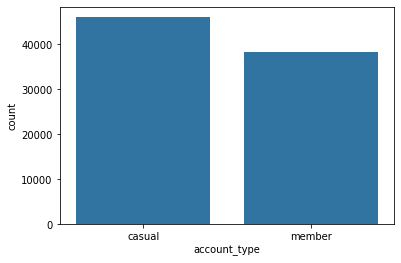

In [28]:
sns.countplot(data = clean_trip_data, x = 'account_type', color = base_color);

#### Started hour

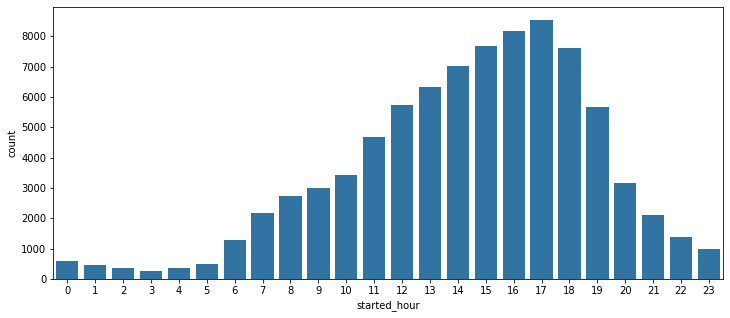

In [29]:
plt.figure(figsize=(12, 5))
sns.countplot(data = clean_trip_data, x = 'started_hour', color = base_color);

#### Ended hour

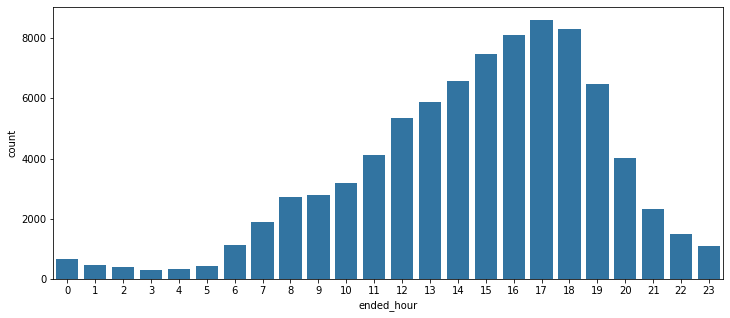

In [30]:
plt.figure(figsize=(12, 5))
sns.countplot(data = clean_trip_data, x = 'ended_hour', color = base_color);

#### Monthday

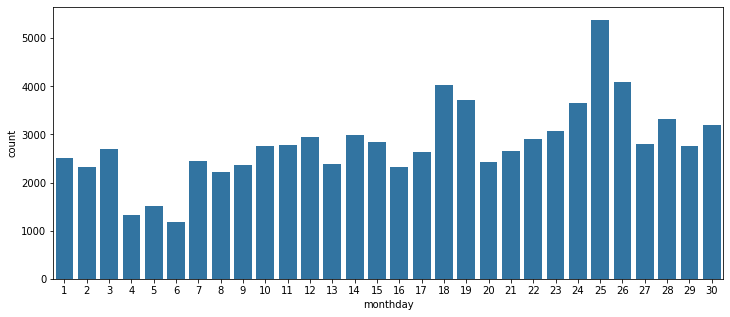

In [31]:
plt.figure(figsize=(12, 5))
sns.countplot(data = clean_trip_data, x = 'monthday', color = base_color);

#### Weekday

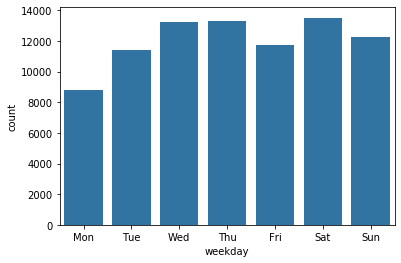

In [32]:
ax = sns.countplot(data = clean_trip_data, x = 'weekday', color = base_color, 
                   order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);

ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);

#### Trip time

In [33]:
clean_trip_data.trip_time.quantile(0.99)

129.3473333333333

In [34]:
trip_time_under_200 = clean_trip_data.query('trip_time < 200')

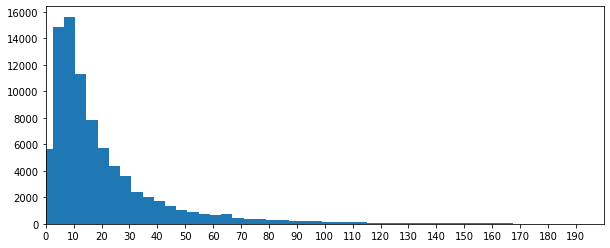

In [35]:
plt.figure(figsize=(10, 4))
plt.hist(data=trip_time_under_200, x='trip_time', bins=50)
plt.xlim(0, 200)
plt.xticks(range(0, 200, 10));

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!